In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import wandb
from pandas.io.json._normalize import nested_to_record

%matplotlib inline

In [10]:
username = "lavender"
project_name = "new_length_performance"
metric_name = "eval/roc_auc"
api = wandb.Api()

# Project is specified by <entity/project-name>
runs = api.runs(f"{username}/{project_name}")
summary_list = []
config_list = []
name_list = []
for run in runs:
    # run.summary are the output key/values like accuracy.
    # We call ._json_dict to omit large files
    summary_list.append(run.summary._json_dict)

    # run.config is the input metrics.
    # We remove special values that start with _.
    conf = nested_to_record(run.config, sep="/")
    config = {k: v for k, v in conf.items() if not k.startswith("_")}
    config_list.append(config)

    # run.name is the name of the run.
    name_list.append(run.name)

import pandas as pd

summary_df = pd.DataFrame.from_records(summary_list)
config_df = pd.DataFrame.from_records(config_list)
name_df = pd.DataFrame({"name": name_list})
data_df = pd.concat([name_df, config_df, summary_df], axis=1)

data_df.to_csv("data/length_eval.csv")

In [11]:
plot_df = data_df[["name", metric_name, "word_cnt"]]
plot_df

,name,eval/roc_auc,word_cnt
0,first_400_words,0.788996,400
1,first_300_words,0.786494,300
2,first_200_words,0.780862,200
3,first_100_words,0.768365,100


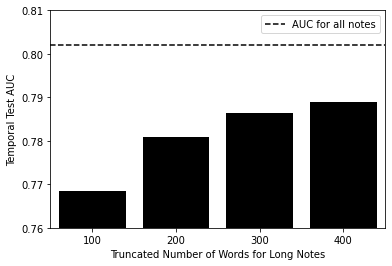

In [21]:
ax = sns.barplot(data=plot_df, x="word_cnt", y=metric_name, color="black")
ax.set(xticklabels=[100, 200, 300, 400])
plt.ylabel("Temporal Test AUC")
plt.xlabel("Truncated Number of Words for Long Notes")
ax.axhline(0.802, linestyle="--", color="black", label="AUC for all notes")
plt.ylim([0.76, 0.81])
plt.legend()
plt.savefig("plots/length_analysis.png", dpi=300)